In [1]:
import os
import pandas as pd

from qiskit.circuit import QuantumCircuit
import optuna
import qtpu
from qtpu.compiler.terminators import reach_num_qubits
from qtpu.compiler.success import success_num_nodes

from benchmark._plot_util import *

In [2]:
from benchmark.ansatz 


benches = [brick_ansatz(200, 6), linear_ansatz(200, 6)]

studies = [
    qtpu.compiler.hyper_optimize(
        circuit, success_fn=success_num_nodes, max_cost=1e9, show_progress_bar=True
    )
    for circuit in benches
]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [3]:
def plot_pareto_front(study: optuna.Study, ax: plt.Axes) -> None:
    trials = set(tuple(trial.values) for trial in study.trials)
    best_trials = sorted(
        set(tuple(trial.values) for trial in study.best_trials),
        key=lambda x: (x[0], -x[1]),
    )
    non_optimal_trials = trials - set(best_trials)

    ax.plot(
        [vals[0] for vals in non_optimal_trials],
        [vals[1] for vals in non_optimal_trials],
        "x",
        # markeredgewidth=2,
        markersize=4,
        markeredgecolor="black",
        label="Non-optimal",
    )
    ax.plot(
        [vals[0] for vals in best_trials],
        [vals[1] for vals in best_trials],
        "o--",
        label="Pareto optimal",
        # color="red",
    )
    
        
    ax.set_xlabel("Contraction Cost")
    ax.set_ylabel("Success")

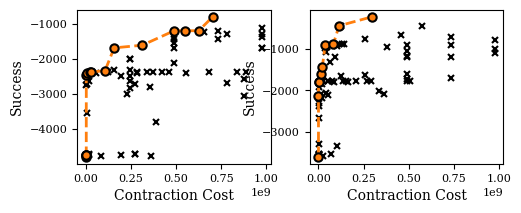

In [4]:
# optuna.visualization.matplotlib.plot_contour(study, target=lambda t: t.values[1], params=["compress", "max_cost"])
# studies = studies[:1]
fig, axes = plt.subplots(1, len(studies), figsize=(5.5, 2))
axes = [axes] if len(studies) == 1 else axes
for ax, study in zip(axes, studies):
    plot_pareto_front(study, ax)
# ax.set_xscale("log")
# ax.set_xlim(-10000, 20000)
fig;

In [5]:
axes[0].set_ylabel("Max. Circuit Size")
axes[0].set_title("")
# set xlim to 4e9
axes[0].set_xlim(-.2e9, 3.5e9)

fig.set_figwidth(4.5)

fig.tight_layout()
fig.savefig("pareto.pdf", bbox_inches="tight")